In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load and normalization vector of parameters.

In [2]:
allpatients = pd.read_csv('TimeFreq_Female.csv')
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-293.430239,101.862316,13.292425,-34.615979,-13.981128,15.430809,14.811644,11.609699,-22.399024,31.506209,0.100478,0.023600,219.746093,0.204873,-0.270142,-1.150720,-0.297840,Zdrowy
1,-163.370591,98.608829,-54.268960,-7.933267,-41.739898,-7.358411,0.884989,-18.851250,-1.047138,12.280790,0.265551,0.066284,746.748472,0.599240,-0.686358,-0.455155,-0.192974,Zdrowy
2,-241.858335,139.226006,-40.755116,-14.336575,-9.495435,-4.305301,11.620185,2.562133,-9.844266,13.291225,0.156921,0.043446,248.259388,0.425534,-0.324867,-0.474273,0.550839,Zdrowy
3,-211.005611,126.482252,-18.056063,-31.040735,-4.248392,-7.870706,15.085091,11.018850,-27.695277,17.300901,0.098562,0.041143,185.977739,0.377677,-0.407918,0.239410,0.580150,Zdrowy
4,-240.771690,141.427767,11.414391,-22.297131,-34.254011,-4.837738,6.969184,13.073304,-4.206142,-6.538549,0.145529,0.034362,188.165510,0.365738,-0.409941,-0.941252,0.352707,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [3]:
features = allpatients.drop(labels='Status',axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-2.053923,-1.247797,1.830072,-0.804297,0.808922,1.263011,0.432243,0.768103,-0.791289,2.442233,-1.274802,-1.722812,-0.774299,-1.841091,1.135021,-1.338427,-1.452019,Zdrowy
1,1.342852,-1.391763,-1.108474,1.185547,-0.956149,-0.514637,-0.623646,-1.698246,1.255177,0.708740,1.860417,0.943735,1.114584,0.563290,-1.023943,-0.576274,-1.209383,Zdrowy
2,-0.707017,0.405535,-0.520697,0.708025,1.094150,-0.276482,0.190273,0.035544,0.412019,0.799847,-0.202791,-0.482999,-0.672102,-0.495764,0.851157,-0.597222,0.511617,Zdrowy
3,0.098765,-0.158372,0.466586,-0.537676,1.427789,-0.554598,0.452975,0.720263,-1.298906,1.161387,-1.311192,-0.626910,-0.895332,-0.787539,0.420362,0.184784,0.579435,Zdrowy
4,-0.678637,0.502963,1.748387,0.114372,-0.480151,-0.318015,-0.162356,0.886608,0.952403,-0.988139,-0.419156,-1.050521,-0.887490,-0.860327,0.409866,-1.108907,0.053187,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [4]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-0.454580,0.132008,0.099425,-0.902771,1.074946,0.914246,-0.320961,0.863318,-0.362769,-0.833383,-0.949444,-0.118069,-0.672975,-0.115257,0.344291,-0.245004,0.159637,Zdrowy
1,1.157455,-0.564567,-0.586526,0.043095,0.823816,0.477315,1.060050,-0.760878,0.508897,-0.502129,1.535919,-0.344743,-0.756092,0.591321,0.105030,-0.642852,0.830777,Chory
2,-0.364231,-0.418478,-0.142054,-0.659279,0.400390,0.282410,-1.884659,0.023657,-0.456800,-1.363661,-1.246805,0.112504,-0.721518,-0.916776,1.240319,0.278592,1.238323,Zdrowy
3,0.061994,-0.325104,1.174619,-0.779257,-1.300416,-1.327037,2.468904,-0.622059,0.344867,0.242971,-0.744096,-0.367754,-0.756436,-0.381192,0.724000,0.068106,0.449816,Chory
4,-0.225858,0.323277,-2.324392,-0.314818,0.242835,-1.734396,1.174026,-1.172978,-0.481865,1.361973,1.099745,1.128452,1.500029,0.010844,-0.430262,-0.940585,-1.106521,Zdrowy


# PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [7]:
from mpl_toolkits.mplot3d import Axes3D

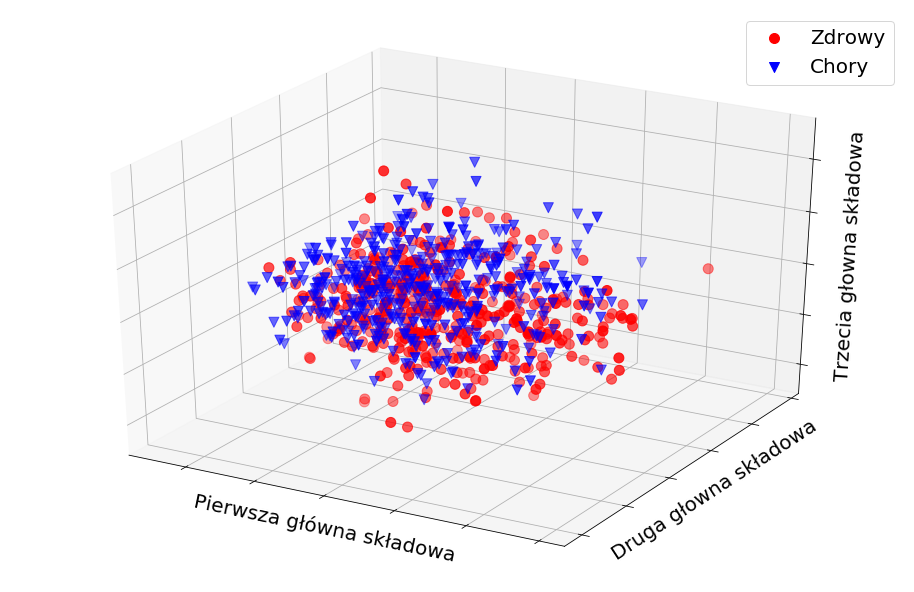

In [8]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga głowna składowa', fontsize=20)
ax.set_zlabel('Trzecia głowna składowa', fontsize=20)
plt.show()

# Dummy variables
We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [5]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [6]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [7]:
allpatients['Chory'] = status
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Chory
0,-0.454580,0.132008,0.099425,-0.902771,1.074946,0.914246,-0.320961,0.863318,-0.362769,-0.833383,-0.949444,-0.118069,-0.672975,-0.115257,0.344291,-0.245004,0.159637,1
1,1.157455,-0.564567,-0.586526,0.043095,0.823816,0.477315,1.060050,-0.760878,0.508897,-0.502129,1.535919,-0.344743,-0.756092,0.591321,0.105030,-0.642852,0.830777,0
2,-0.364231,-0.418478,-0.142054,-0.659279,0.400390,0.282410,-1.884659,0.023657,-0.456800,-1.363661,-1.246805,0.112504,-0.721518,-0.916776,1.240319,0.278592,1.238323,1
3,0.061994,-0.325104,1.174619,-0.779257,-1.300416,-1.327037,2.468904,-0.622059,0.344867,0.242971,-0.744096,-0.367754,-0.756436,-0.381192,0.724000,0.068106,0.449816,0
4,-0.225858,0.323277,-2.324392,-0.314818,0.242835,-1.734396,1.174026,-1.172978,-0.481865,1.361973,1.099745,1.128452,1.500029,0.010844,-0.430262,-0.940585,-1.106521,1


# Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'], axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.25, 
                                                    random_state=42)

### K-fold validation
I dicided to use k-fold validation due to low num of train examples

In [11]:
num_folds = 5

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# Logistic Regression Algorithm

In [12]:
from sklearn.linear_model import LogisticRegression

In [15]:
results = {}
best_acc = -1
best_model = None
C = [1e-2, 5e-2, 1e-1, 1.2e-1, 2e-1, 4e-1, 5e-1, 5.25e-1, 5.5e-1, 5.75e-1, 6e-1, 1, 2, 3, 4]

for reg in C:
    #reset accuraties for folds
    train_acc = 0 
    val_acc = 0
    
    for i in range(num_folds):
        logModel = LogisticRegression(penalty='l1', C=reg, solver='liblinear')
        
        train_set = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
        labels_set = np.concatenate(y_train_folds[:i]+y_train_folds[i+1:])
        
        logModel.fit(train_set, labels_set)
        #sum acc for each fold
        y_train_pred = logModel.predict(train_set)
        train_acc += np.mean(y_train_pred == labels_set) 
        
        y_val_pred = logModel.predict(X_train_folds[i])
        val_acc += np.mean(y_val_pred == y_train_folds[i])
        
    #compute mean for accuraties
    train_acc /= num_folds
    val_acc /= num_folds
    results[reg] = (train_acc, val_acc)
    if val_acc > best_acc:
            best_acc = val_acc
            best_model = logModel
            
# Print out results.
for C in sorted(results):
    train_accuracy, val_accuracy = results[C]
    print('C %e train accuracy: %f val accuracy: %f' % (
                C, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_acc)

C 1.000000e-02 train accuracy: 0.481312 val accuracy: 0.481371
C 5.000000e-02 train accuracy: 0.703654 val accuracy: 0.677531
C 1.000000e-01 train accuracy: 0.716116 val accuracy: 0.691606
C 1.200000e-01 train accuracy: 0.718456 val accuracy: 0.691594
C 2.000000e-01 train accuracy: 0.732093 val accuracy: 0.704058
C 4.000000e-01 train accuracy: 0.747673 val accuracy: 0.710296
C 5.000000e-01 train accuracy: 0.751953 val accuracy: 0.711846
C 5.250000e-01 train accuracy: 0.752342 val accuracy: 0.711846
C 5.500000e-01 train accuracy: 0.752731 val accuracy: 0.711846
C 5.750000e-01 train accuracy: 0.753508 val accuracy: 0.713396
C 6.000000e-01 train accuracy: 0.754676 val accuracy: 0.711834
C 1.000000e+00 train accuracy: 0.757402 val accuracy: 0.710296
C 2.000000e+00 train accuracy: 0.756624 val accuracy: 0.710296
C 3.000000e+00 train accuracy: 0.756234 val accuracy: 0.708721
C 4.000000e+00 train accuracy: 0.757012 val accuracy: 0.705608
best validation accuracy achieved during cross-validati

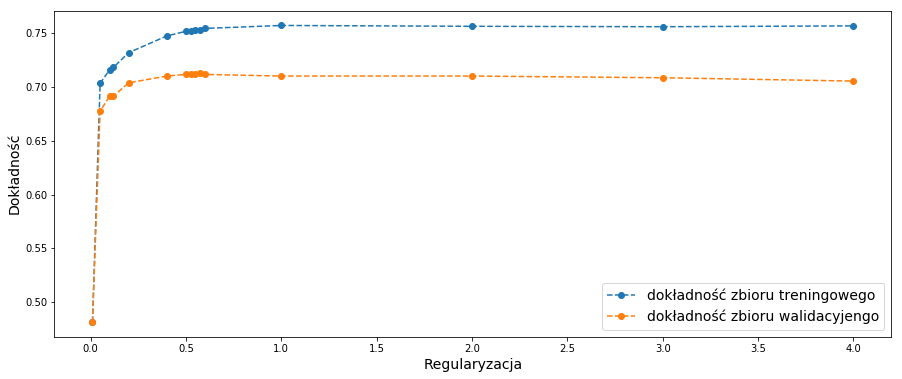

In [16]:
train = []
val = [] 
c = []
for C in sorted(results):
    train_accuracy, val_accuracy = results[C]
    train.append(train_accuracy)
    val.append(val_accuracy)
    c.append(C)
    
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.plot(c,train, 'o--', label='dokładność zbioru treningowego')
plt.plot(c,val, 'o--',label='dokładność zbioru walidacyjengo')
ax.set_xlabel('Regularyzacja', fontsize=14)
ax.set_ylabel('Dokładność', fontsize=14)
plt.legend(loc='lower right', frameon = True, fontsize=14)

In [23]:
prediction = best_model.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74       119
           1       0.67      0.76      0.71        95

   micro avg       0.73      0.73      0.73       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.73      0.73       214



In [26]:
print(confusion_matrix(y_test,prediction))

[[84 35]
 [23 72]]


# Random Forest Algorithm

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
results = {}
best_acc = -1
best_model = None
n_estimators = [10,20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130 , 140, 150, 200,250, 300]#, 400, 450, 500, 550, 600]

for n in n_estimators:
    #reset accuraties for folds
    val_acc = 0
    
    for i in range(num_folds):
        rf_model = RandomForestClassifier(n_estimators=n)
        
        train_set = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
        labels_set = np.concatenate(y_train_folds[:i]+y_train_folds[i+1:])
        
        rf_model.fit(train_set, labels_set) 
        
        y_val_pred = rf_model.predict(X_train_folds[i])
        val_acc += np.mean(y_val_pred == y_train_folds[i])
        
    #compute mean for accuraties
    val_acc /= num_folds
    results[n] = val_acc
    if val_acc > best_acc:
            best_acc = val_acc
            best_model = rf_model

# Print out results.
for n in sorted(results):
    val_accuracy = results[n]
    print('n_estimators %e val accuracy: %f' % (n, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_acc)

n_estimators 1.000000e+01 val accuracy: 0.652628
n_estimators 2.000000e+01 val accuracy: 0.661906
n_estimators 3.000000e+01 val accuracy: 0.679167
n_estimators 4.000000e+01 val accuracy: 0.671342
n_estimators 5.000000e+01 val accuracy: 0.685320
n_estimators 6.000000e+01 val accuracy: 0.683842
n_estimators 7.000000e+01 val accuracy: 0.683794
n_estimators 8.000000e+01 val accuracy: 0.679058
n_estimators 9.000000e+01 val accuracy: 0.686882
n_estimators 1.000000e+02 val accuracy: 0.679142
n_estimators 1.200000e+02 val accuracy: 0.677531
n_estimators 1.300000e+02 val accuracy: 0.674419
n_estimators 1.400000e+02 val accuracy: 0.663590
n_estimators 1.500000e+02 val accuracy: 0.674443
n_estimators 2.000000e+02 val accuracy: 0.672856
n_estimators 2.500000e+02 val accuracy: 0.676030
n_estimators 3.000000e+02 val accuracy: 0.672917
best validation accuracy achieved during cross-validation: 0.686882


Text(0,0.5,'dokładność zbioru walidacyjnego')

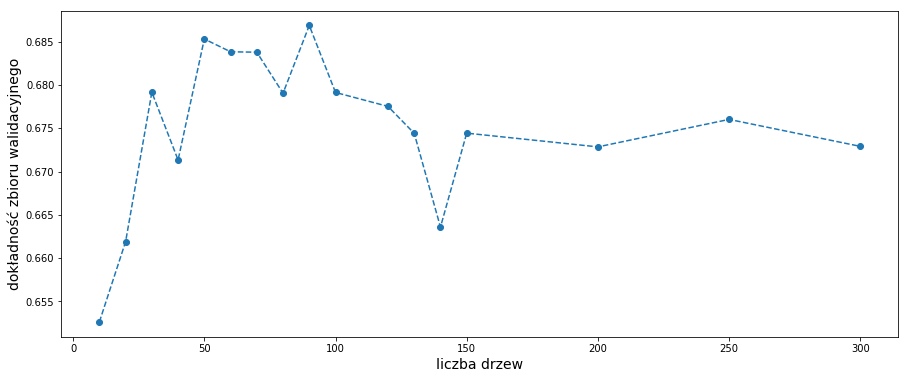

In [30]:
val = [] 
n_estimators = []
for n in sorted(results):
    val_accuracy = results[n]
    val.append(val_accuracy)
    n_estimators.append(n)
    
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.plot(n_estimators, val, 'o--')
ax.set_xlabel('liczba drzew', fontsize=14)
ax.set_ylabel('dokładność zbioru walidacyjnego', fontsize=14)

In [28]:
prediction = best_model.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74       119
           1       0.67      0.76      0.71        95

   micro avg       0.73      0.73      0.73       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.73      0.73       214



In [25]:
print(confusion_matrix(y_test,prediction))

[[54 24]
 [33 61]]


In [26]:
feature_importance = clf.feature_importances_

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

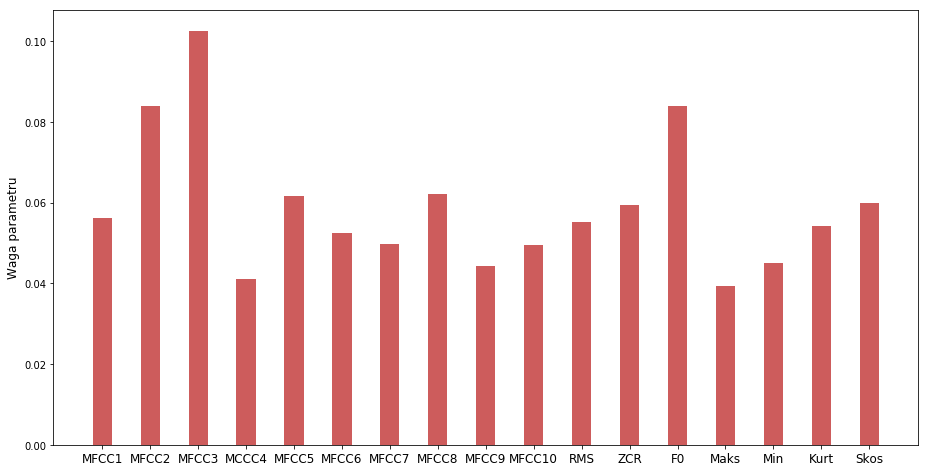

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt',
       'Skos'], fontsize=12)

In [24]:
feature_list = ['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurtoza',
       'Wspł skośności']

### Small decison tree visualisation


In [10]:
# derive small parameters vector for edu sake
X_tiny = allpatients[['MFCC1', 'MFCC2', 'F0']]

X_train, X_test, y_train, y_test = train_test_split(X_tiny,
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [11]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 2)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[3]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ['faeture1', 'feature2', 'feature2'], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [30]:
allpatients.columns

Index(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'MAX', 'MIN', 'KURTOSIS',
       'SKEWNESS', 'Chory'],
      dtype='object')